# Which has a greater impact on life expectancy in 193 countries, alcohol consumption or education? 

### 1. Introduction and Literature Review

Despite the fact that many research have been conducted in the past on factors influencing life expectancy, including demographic variables, income composition, and death rates. It was discovered that the impact of immunisation and the human development index was not previously considered. In addition, some previous studies considered multiple linear regression based on a one-year data set for all countries. As a result, this provides incentive to address both of the previously mentioned concerns by developing a regression model based on a mixed effects model and multiple linear regression using data from 2000 to 2015 for all nations. Important immunisations such as Hepatitis B, Polio, and Diphtheria will be considered as well. This study will concentrate on immunisation factors, mortality factors, economic factors, social issues, and other health-related factors. Because the observations in this dataset are from diverse countries, it will be easier for a country to identify the predictive factor that is contributing to a lower life expectancy value. This will assist in advising a country on which areas should be prioritised in order to effectively raise the life expectancy of its population.

One of the literatures being referred is this [source](https://ieeexplore.ieee.org/abstract/document/9332159). Life expectancy is an important indicator for assessing a country's health. With the use of a Supervised Machine Learning model, this research compares life expectancy in developed and developing countries. Three regression models are used to train the prediction model: Linear Regression, Decision Tree Regressor, and Random Forest Regressor. The model is chosen based on the R 2 score, Mean Squared Error, and Mean Absolute Error. Random Forest Regressor was chosen for the building of the life expectancy prediction model because it had R 2 scores of 0.99 and 0.95 on training and testing data, respectively, as well as Mean Squared Error and Mean Absolute Error of 4.43 and 1.58. The comparison study is based on HIV/AIDS, Adult Mortality, and Healthcare Expenditure, as these are the key features recommended by the model. According to the research, affluent countries have a higher life expectancy than underdeveloped countries. Because of insufficient healthcare spending, India has a high adult mortality rate when compared to other wealthy countries. The findings of this investigation can be utilised to benefit society by the government and healthcare sectors.

### 2. Research Question



Which has a greater impact on life expectancy in 193 countries, alcohol consumption or education? This could be the more focused research question. However, in general, we'd like to see which predictive variables have an effect on life expectancy. 

### 3. Presentation of Data

The project is dependent on data accuracy. The World Health Organization's (WHO) Global Health Observatory (GHO) data repository keeps track of all countries' health status as well as many other related parameters. The data sets are made available to the public for the aim of analysing health data. The data set on life expectancy and health factors for 193 nations was obtained from the same WHO data repository website, as was the comparable economic data from the United Nations website. Only the most representative critical factors were picked from all categories of health-related factors. In comparison to the previous 30 years, there has been a significant improvement in the health sector over the last 15 years, resulting in lower human mortality rates, particularly in developing countries. As a result, in this study, we considered data from 2000 to 2015 for 193 nations for further analysis. Individual data files have been combined into a single data-set. A cursory review of the data revealed some missing values. We noticed no obvious flaws in the data sets because they were from WHO. The Missmap command in R software was used to handle missing data. The results showed that the majority of the missing data was for the population, Hepatitis B, and GDP. The missing data came from lesser-known countries such as Vanuatu, Tonga, Togo, Cabo Verde, and others. Finding complete data for these countries was tough, therefore we opted to eliminate them from the final model data-set. The final merged file (final dataset) has 22 columns and 2938 rows, resulting in 20 predicting variables. All predicted variables were then classified into four main categories: vaccination-related factors, mortality-related factors, economic factors, and social factors.

**Acknowledgements**
The data was collected from WHO and United Nations website with the help of Deeksha Russell and Duan Wang [link](https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who) 

Here is a list of the variables in the dataset:
1. Country
2. Year
3. Status. Developed or Developing status
4. Life expectancy. Life expectancy in age
5. Adult Mortality. Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
6. Infant Deaths. Number of Infant Deaths per 1000 population
7. Alcohol. Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
8. Percentage Expenditure. Expenditure on health as a percentage of Gross Domestic Product per capita(%)
9. Hepatitis B. Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
10. Measles. Measles - number of reported cases per 1000 population
11. BMI. Average Body Mass Index of entire population
12. Under-five Deaths. Number of under-five deaths per 1000 population
13. Polio. Polio (Pol3) immunization coverage among 1-year-olds (%)
14. Total Expenditure. General government expenditure on health as a percentage of total government expenditure (%)
15. Diphtheria. Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
16. HIV/AIDS. Deaths per 1 000 live births HIV/AIDS (0-4 years)
17. GDP. Gross Domestic Product per capita (in USD)
18. Population. Population of the country
19. Thinness 10-19 Years. Prevalence of thinness among children and adolescents for Age 10 to 19 (% )
20. Thinness 5-9 Years. Prevalence of thinness among children for Age 5 to 9(%)
21. Income Composition of Resources. Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
22. Schooling. Number of years of Schooling(years)

In [1]:
import datetime
now = datetime.datetime.now()
print("Last executed: " + now.strftime("%Y-%m-%d %H:%M:%S"))

Last executed: 2023-04-24 09:05:00


In [2]:
pip install pycountry

Note: you may need to restart the kernel to use updated packages.


In [34]:
# Import all the required libraries
%matplotlib inline  
import matplotlib.pyplot as plt
import statsmodels.api as sm
from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import sem
import statistics 
import seaborn as sns
from IPython.display import display, Math, Latex, display_latex
import plotly.express as px
import pylab
import pycountry
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None) # specifies number of rows to show
pd.options.display.float_format = '{:40,.2f}'.format # specifies default number format to 2 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
from sklearn.impute import SimpleImputer
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, validation_curve
from sklearn.metrics import mean_squared_error
# CART
from sklearn.tree import DecisionTreeRegressor
# random forest
from sklearn.ensemble import RandomForestRegressor
# feature importance
import rfpimp
# xgboost
import xgboost
from xgboost import XGBRegressor

In [4]:
# Data loading and exploration
data =  pd.read_csv('https://raw.githubusercontent.com/hansenwgn/DSSS/main/LifeExpectancyData.csv')
data.head(5)

Country  Year      Status                         Life expectancy   \
0  Afghanistan  2015  Developing                                    65.00   
1  Afghanistan  2014  Developing                                    59.90   
2  Afghanistan  2013  Developing                                    59.90   
3  Afghanistan  2012  Developing                                    59.50   
4  Afghanistan  2011  Developing                                    59.20   

                           Adult Mortality  infant deaths  \
0                                   263.00             62   
1                                   271.00             64   
2                                   268.00             66   
3                                   272.00             69   
4                                   275.00             71   

                                   Alcohol  \
0                                     0.01   
1                                     0.01   
2                                     0.01   
3                                     0.01   
4                                     0.01   

                    percentage expenditure  \
0                                    71.28   
1                                    73.52   
2                                    73.22   
3                                    78.18   
4                                     7.10   

                               Hepatitis B  Measles   \
0                                    65.00      1154   
1                                    62.00       492   
2                                    64.00       430   
3                                    67.00      2787   
4                                    68.00      3013   

                                      BMI   under-five deaths   \
0                                    19.10                  83   
1                                    18.60                  86   
2                                    18.10                  89   
3                                    17.60                  93   
4                                    17.20                  97   

                                     Polio  \
0                                     6.00   
1                                    58.00   
2                                    62.00   
3                                    67.00   
4                                    68.00   

                         Total expenditure  \
0                                     8.16   
1                                     8.18   
2                                     8.13   
3                                     8.52   
4                                     7.87   

                               Diphtheria   \
0                                    65.00   
1                                    62.00   
2                                    64.00   
3                                    67.00   
4                                    68.00   

                                  HIV/AIDS  \
0                                     0.10   
1                                     0.10   
2                                     0.10   
3                                     0.10   
4                                     0.10   

                                       GDP  \
0                                   584.26   
1                                   612.70   
2                                   631.74   
3                                   669.96   
4                                    63.54   

                                Population  \
0                            33,736,494.00   
1                               327,582.00   
2                            31,731,688.00   
3                             3,696,958.00   
4                             2,978,599.00   

                      thinness  1-19 years  \
0                                    17.20   
1                                    17.50   
2                                    17.70   
3                                    17.90 

In [5]:
# Size of the data 
data.shape

(2938, 22)

We can see that our dataset contains 2938 rows and 22 attributes!

In [6]:
# A Quick Information about the Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [7]:
# Remove white space in the column names
data.columns = data.columns.str.replace(' ', '')

In [8]:
# Checking for Null Values
data.isnull().sum()

Country                           0
Year                              0
Status                            0
Lifeexpectancy                   10
AdultMortality                   10
infantdeaths                      0
Alcohol                         194
percentageexpenditure             0
HepatitisB                      553
Measles                           0
BMI                              34
under-fivedeaths                  0
Polio                            19
Totalexpenditure                226
Diphtheria                       19
HIV/AIDS                          0
GDP                             448
Population                      652
thinness1-19years                34
thinness5-9years                 34
Incomecompositionofresources    167
Schooling                       163
dtype: int64

In [9]:
# Replacing the Null Values with mean values of the data
imputer=SimpleImputer(missing_values=np.nan,strategy='mean',fill_value=None)
data['Lifeexpectancy']=imputer.fit_transform(data[['Lifeexpectancy']])
data['AdultMortality']=imputer.fit_transform(data[['AdultMortality']])
data['Alcohol']=imputer.fit_transform(data[['Alcohol']])
data['HepatitisB']=imputer.fit_transform(data[['HepatitisB']])
data['BMI']=imputer.fit_transform(data[['BMI']])
data['Polio']=imputer.fit_transform(data[['Polio']])
data['Totalexpenditure']=imputer.fit_transform(data[['Totalexpenditure']])
data['Diphtheria']=imputer.fit_transform(data[['Diphtheria']])
data['GDP']=imputer.fit_transform(data[['GDP']])
data['Population']=imputer.fit_transform(data[['Population']])
data['thinness1-19years']=imputer.fit_transform(data[['thinness1-19years']])
data['thinness5-9years']=imputer.fit_transform(data[['thinness5-9years']])
data['Incomecompositionofresources']=imputer.fit_transform(data[['Incomecompositionofresources']])
data['Schooling']=imputer.fit_transform(data[['Schooling']])

In [10]:
data.isnull().sum()

Country                         0
Year                            0
Status                          0
Lifeexpectancy                  0
AdultMortality                  0
infantdeaths                    0
Alcohol                         0
percentageexpenditure           0
HepatitisB                      0
Measles                         0
BMI                             0
under-fivedeaths                0
Polio                           0
Totalexpenditure                0
Diphtheria                      0
HIV/AIDS                        0
GDP                             0
Population                      0
thinness1-19years               0
thinness5-9years                0
Incomecompositionofresources    0
Schooling                       0
dtype: int64

In [71]:
summary=data.describe().round(2)  # generate summary statistics, and round everything to 2 decimal degrees
summary=summary.T #.T transposes the table (rows become columns and vice versa)
summary

count  \
Year                                                         2,938.00   
Lifeexpectancy                                               2,938.00   
AdultMortality                                               2,938.00   
infantdeaths                                                 2,938.00   
Alcohol                                                      2,938.00   
percentageexpenditure                                        2,938.00   
HepatitisB                                                   2,938.00   
Measles                                                      2,938.00   
BMI                                                          2,938.00   
under-fivedeaths                                             2,938.00   
Polio                                                        2,938.00   
Totalexpenditure                                             2,938.00   
Diphtheria                                                   2,938.00   
HIV/AIDS                                                     2,938.00   
GDP                                                          2,938.00   
Population                                                   2,938.00   
thinness1-19years                                            2,938.00   
thinness5-9years                                             2,938.00   
Incomecompositionofresources                                 2,938.00   
Schooling                                                    2,938.00   

                                                                 mean  \
Year                                                         2,007.52   
Lifeexpectancy                                                  69.22   
AdultMortality                                                 164.80   
infantdeaths                                                    30.30   
Alcohol                                                          4.60   
percentageexpenditure                                          738.25   
HepatitisB                                                      80.94   
Measles                                                      2,419.59   
BMI                                                             38.32   
under-fivedeaths                                                42.04   
Polio                                                           82.55   
Totalexpenditure                                                 5.94   
Diphtheria                                                      82.32   
HIV/AIDS                                                         1.74   
GDP                                                          7,483.16   
Population                                              12,753,375.12   
thinness1-19years                                                4.84   
thinness5-9years                                                 4.87   
Incomecompositionofresources                                     0.63   
Schooling                                                       11.99   

                                                                  std  \
Year                                                             4.61   
Lifeexpectancy                                                   9.51   
AdultMortality                                                 124.08   
infantdeaths                                                   117.93   
Alcohol                                                          3.92   
percentageexpenditure                                        1,987.91   
HepatitisB                                                      22.59   
Measles                                                     11,467.27   
BMI                                                             19.93   
under-fivedeaths                                               160.45   
Polio                                                           23.35   
Totalexpenditure                                                 2.40   
Diphtheria                                     

Some of the variables are noted per 1000 population, however we can see that there are some variables with values greater than 1000 that do not appear to be correct, such as Measles, infant deaths, and under-five deaths. We shall attempt to eliminate the outliers. 

In [72]:
def filter_outliers(var):
    q1 = var.quantile(0.25) # calculate the first quartile
    q3 = var.quantile(0.75) # calculate the third quartile
    iqr = q3 - q1 # calculate the interquartile range
    low = q1 - 3*iqr # calculate the lower bound
    high = q3 + 3*iqr # calculate the upper bound
    filtered = data[(var > low) & (var < high)] # filter  the values that are within the bounds
    dropped_observations= len(var)-len(filtered) # calculate the number of observations that were dropped

    print('Dropped {} observations'.format(dropped_observations))
    return  filtered

data=filter_outliers(data['Measles']) # filter outliers from Measles

Dropped 451 observations


In [73]:
summary=data.describe().round(2)  # generate summary statistics, and round everything to 2 decimal degrees
summary=summary.T #.T transposes the table (rows become columns and vice versa)
summary

count  \
Year                                                         2,487.00   
Lifeexpectancy                                               2,487.00   
AdultMortality                                               2,487.00   
infantdeaths                                                 2,487.00   
Alcohol                                                      2,487.00   
percentageexpenditure                                        2,487.00   
HepatitisB                                                   2,487.00   
Measles                                                      2,487.00   
BMI                                                          2,487.00   
under-fivedeaths                                             2,487.00   
Polio                                                        2,487.00   
Totalexpenditure                                             2,487.00   
Diphtheria                                                   2,487.00   
HIV/AIDS                                                     2,487.00   
GDP                                                          2,487.00   
Population                                                   2,487.00   
thinness1-19years                                            2,487.00   
thinness5-9years                                             2,487.00   
Incomecompositionofresources                                 2,487.00   
Schooling                                                    2,487.00   

                                                                 mean  \
Year                                                         2,007.81   
Lifeexpectancy                                                  70.27   
AdultMortality                                                 157.53   
infantdeaths                                                    11.45   
Alcohol                                                          4.84   
percentageexpenditure                                          822.44   
HepatitisB                                                      82.39   
Measles                                                        122.49   
BMI                                                             40.66   
under-fivedeaths                                                16.02   
Polio                                                           84.75   
Totalexpenditure                                                 6.09   
Diphtheria                                                      84.48   
HIV/AIDS                                                         1.62   
GDP                                                          8,128.63   
Population                                               8,398,198.47   
thinness1-19years                                                4.27   
thinness5-9years                                                 4.29   
Incomecompositionofresources                                     0.64   
Schooling                                                       12.32   

                                                                  std  \
Year                                                             4.52   
Lifeexpectancy                                                   9.09   
AdultMortality                                                 120.68   
infantdeaths                                                    28.79   
Alcohol                                                          3.95   
percentageexpenditure                                        2,110.97   
HepatitisB                                                      21.94   
Measles                                                        266.45   
BMI                                                             19.64   
under-fivedeaths                                                41.73   
Polio                                                           21.82   
Totalexpenditure                                                 2.44   
Diphtheria                                     

In [74]:
data = data.drop(data[data['Measles']>1000].index)

In [75]:
summary=data.describe().round(2)  # generate summary statistics, and round everything to 2 decimal degrees
summary=summary.T #.T transposes the table (rows become columns and vice versa)
summary

count  \
Year                                                         2,413.00   
Lifeexpectancy                                               2,413.00   
AdultMortality                                               2,413.00   
infantdeaths                                                 2,413.00   
Alcohol                                                      2,413.00   
percentageexpenditure                                        2,413.00   
HepatitisB                                                   2,413.00   
Measles                                                      2,413.00   
BMI                                                          2,413.00   
under-fivedeaths                                             2,413.00   
Polio                                                        2,413.00   
Totalexpenditure                                             2,413.00   
Diphtheria                                                   2,413.00   
HIV/AIDS                                                     2,413.00   
GDP                                                          2,413.00   
Population                                                   2,413.00   
thinness1-19years                                            2,413.00   
thinness5-9years                                             2,413.00   
Incomecompositionofresources                                 2,413.00   
Schooling                                                    2,413.00   

                                                                 mean  \
Year                                                         2,007.80   
Lifeexpectancy                                                  70.50   
AdultMortality                                                 155.37   
infantdeaths                                                    10.34   
Alcohol                                                          4.88   
percentageexpenditure                                          835.29   
HepatitisB                                                      82.68   
Measles                                                         88.98   
BMI                                                             41.06   
under-fivedeaths                                                14.40   
Polio                                                           85.22   
Totalexpenditure                                                 6.10   
Diphtheria                                                      84.97   
HIV/AIDS                                                         1.58   
GDP                                                          8,245.16   
Population                                               8,185,980.47   
thinness1-19years                                                4.17   
thinness5-9years                                                 4.17   
Incomecompositionofresources                                     0.64   
Schooling                                                       12.39   

                                                                  std  \
Year                                                             4.52   
Lifeexpectancy                                                   8.97   
AdultMortality                                                 119.35   
infantdeaths                                                    24.40   
Alcohol                                                          3.94   
percentageexpenditure                                        2,125.63   
HepatitisB                                                      21.86   
Measles                                                        186.94   
BMI                                                             19.54   
under-fivedeaths                                                35.42   
Polio                                                           21.44   
Totalexpenditure                                                 2.44   
Diphtheria                                     

In [92]:
data.head()

Country  Year      Status                           Lifeexpectancy  \
1   Afghanistan  2014  Developing                                    59.90   
2   Afghanistan  2013  Developing                                    59.90   
11  Afghanistan  2004  Developing                                    57.00   
12  Afghanistan  2003  Developing                                    56.70   
16      Albania  2015  Developing                                    77.80   

                             AdultMortality  infantdeaths  \
1                                    271.00            64   
2                                    268.00            66   
11                                   293.00            87   
12                                   295.00            87   
16                                    74.00             0   

                                    Alcohol  \
1                                      0.01   
2                                      0.01   
11                                     0.02   
12                                     0.01   
16                                     4.60   

                      percentageexpenditure  \
1                                     73.52   
2                                     73.22   
11                                    15.30   
12                                    11.09   
16                                   364.98   

                                 HepatitisB  Measles  \
1                                     62.00      492   
2                                     64.00      430   
11                                    67.00      466   
12                                    65.00      798   
16                                    99.00        0   

                                        BMI  under-fivedeaths  \
1                                     18.60                86   
2                                     18.10                89   
11                                    13.80               120   
12                                    13.40               122   
16                                    58.00                 0   

                                      Polio  \
1                                     58.00   
2                                     62.00   
11                                     5.00   
12                                    41.00   
16                                    99.00   

                           Totalexpenditure  \
1                                      8.18   
2                                      8.13   
11                                     8.79   
12                                     8.82   
16                                     6.00   

                                 Diphtheria  \
1                                     62.00   
2                                     64.00   
11                                     5.00   
12                                    41.00   
16                                    99.00   

                                   HIV/AIDS  \
1                                      0.10   
2                                      0.10   
11                                     0.10   
12                                     0.10   
16                                     0.10   

                                        GDP  \
1                                    612.70   
2                                    631.74   
11                                   219.14   
12                                   198.73   
16                                 3,954.23   

                                 Population  \
1                                327,582.00   
2                             31,731,688.00   
11                            24,118,979.00   
12                             2,364,851.00   
16                                28,873.00   

                          thinness1-19years  \
1                                     17.50   
2                                     17.70   
11                                    1

Let's look at the correlation coefficients of all the attributes with each other, since this will tell us more about how the various attributes depend on each other and give us a better understanding of the dependency of attributes on each other.

In [96]:
data.corr()
# This will generate a correlation matrix that computes the Pearsons correlation coefficient between columns.

Year  \
Year                                                             1.00   
Lifeexpectancy                                                   0.11   
AdultMortality                                                  -0.06   
infantdeaths                                                     0.02   
Alcohol                                                         -0.11   
percentageexpenditure                                            0.02   
HepatitisB                                                       0.08   
Measles                                                         -0.01   
BMI                                                              0.06   
under-fivedeaths                                                 0.01   
Polio                                                            0.04   
Totalexpenditure                                                 0.04   
Diphtheria                                                       0.08   
HIV/AIDS                                                        -0.11   
GDP                                                              0.08   
Population                                                       0.03   
thinness1-19years                                                0.01   
thinness5-9years                                                 0.01   
Incomecompositionofresources                                     0.21   
Schooling                                                        0.15   

                                                       Lifeexpectancy  \
Year                                                             0.11   
Lifeexpectancy                                                   1.00   
AdultMortality                                                  -0.72   
infantdeaths                                                    -0.39   
Alcohol                                                          0.40   
percentageexpenditure                                            0.38   
HepatitisB                                                       0.17   
Measles                                                         -0.21   
BMI                                                              0.52   
under-fivedeaths                                                -0.42   
Polio                                                            0.38   
Totalexpenditure                                                 0.19   
Diphtheria                                                       0.39   
HIV/AIDS                                                        -0.57   
GDP                                                              0.43   
Population                                                       0.06   
thinness1-19years                                               -0.52   
thinness5-9years                                                -0.53   
Incomecompositionofresources                                     0.68   
Schooling                                                        0.71   

                                                       AdultMortality  \
Year                                                            -0.06   
Lifeexpectancy                                                  -0.72   
AdultMortality                                                   1.00   
infantdeaths                                                     0.28   
Alcohol                                                         -0.19   
percentageexpenditure                                           -0.24   
HepatitisB                                                      -0.13   
Measles                                                          0.14   
BMI                                                             -0.38   
under-fivedeaths                                                 0.30   
Polio                                                           -0.25   
Totalexpenditure                                                -0.11   
Diphtheria                                      

Now, for a better visual comprehension, let's create a heatmap from the aforementioned matrix.

In [97]:
corr = data.corr()
corr.style.background_gradient(cmap='PuOr')

We can make the following preliminary findings from the heatmap:

1. Variables that are quite highly positively correlated with Life Expectancy are Schooling (0.71), Income composition of resources (0.68) and BMI (0.52).
2. Variables that are quite highly negatively correlated with Life Expectancy are Adult Mortality (-0.72) and HIV/AIDS (-0.57)
3. Percentage Expenditure and GDP are quite highly correlated (0.89)
4. Income composition of resources and Schooling are quite highly correlated (0.77)

Let's use seaborn to illustrate this reliance.

In [15]:
# sns.pairplot(data)

This plot has generated scatter plots or histograms of the various attributes in relation to each other, which substantially facilitates correlation analysis. However, I'll keep it commented because the variables are numerous, and for further analysis, we may choose or select the variables that we want to view, for example. To see the plots, remove the hashtag and run. 

#### Some Visualisations

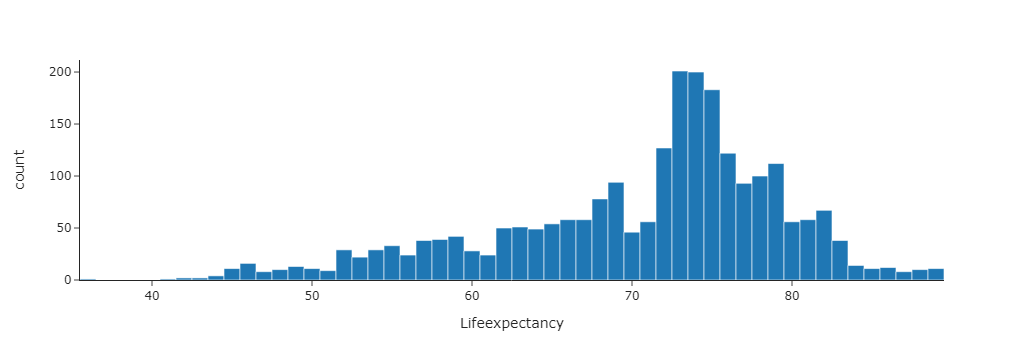

In [98]:
# Histogram of Life Expectancy
fig=px.histogram(data,x='Lifeexpectancy',template='simple_white')
fig.show()

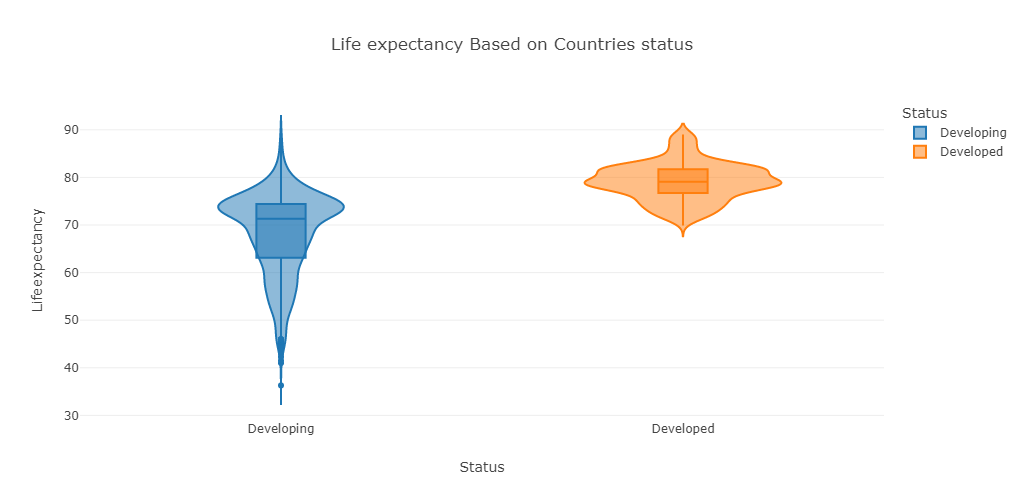

In [99]:
# Life expectancy Based on Countries status
fig=px.violin(data,x='Status',y='Lifeexpectancy',color='Status',template='none',box=True,title='Life expectancy Based on Countries status',width=800, height=500)
fig.show()

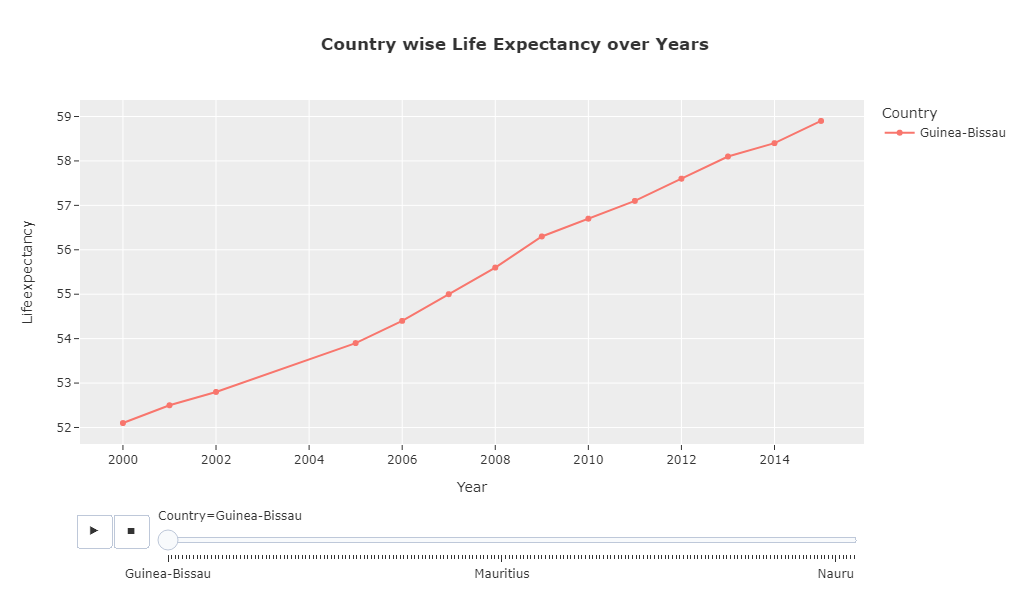

In [100]:
# Country wise Life Expectancy over Years
fig=px.line(data.sort_values(by='Year'),x='Year',y='Lifeexpectancy',animation_frame='Country',animation_group='Year',color='Country',markers=True,template='ggplot2',title='<b> Country wise Life Expectancy over Years', width=900, height=600)
fig.show()

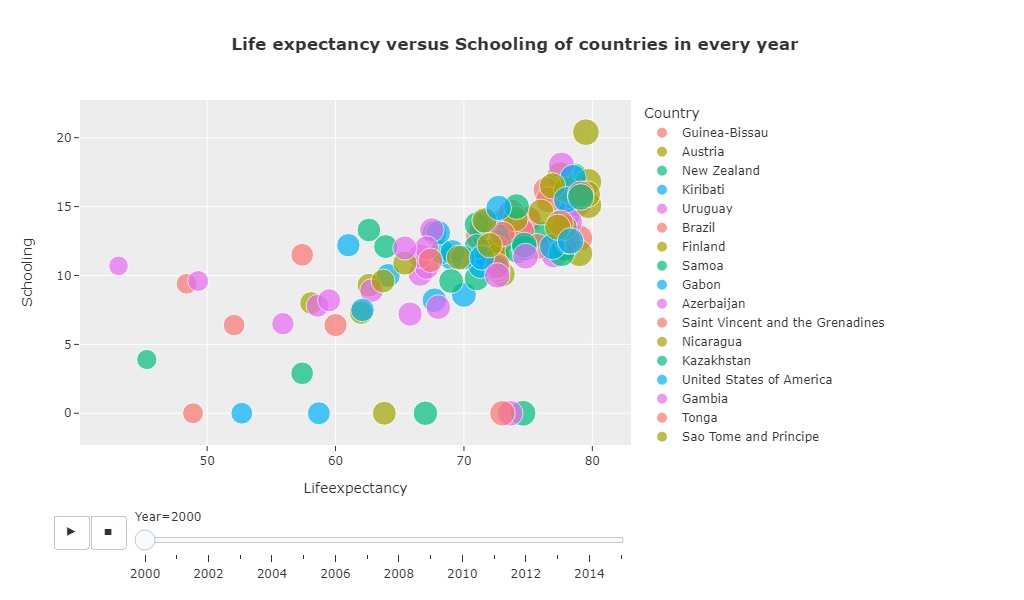

In [101]:
# Life expectancy versus Schooling of countries in every year
px.scatter(data.sort_values(by='Year'),y='Schooling',x='Lifeexpectancy',animation_frame='Year',animation_group='Country',
           template='ggplot2',color='Country',size='Lifeexpectancy',
           title='<b> Life expectancy versus Schooling of countries in every year', width=1200, height=600)


Let's create a chloropleth map of different countries' Life Expectancy through time.

could not add ISO 3 code for -> Bolivia (Plurinational State of)
could not add ISO 3 code for -> Democratic Republic of the Congo
could not add ISO 3 code for -> Iran (Islamic Republic of)
could not add ISO 3 code for -> Micronesia (Federated States of)
could not add ISO 3 code for -> Swaziland
could not add ISO 3 code for -> The former Yugoslav republic of Macedonia
could not add ISO 3 code for -> Venezuela (Bolivarian Republic of)


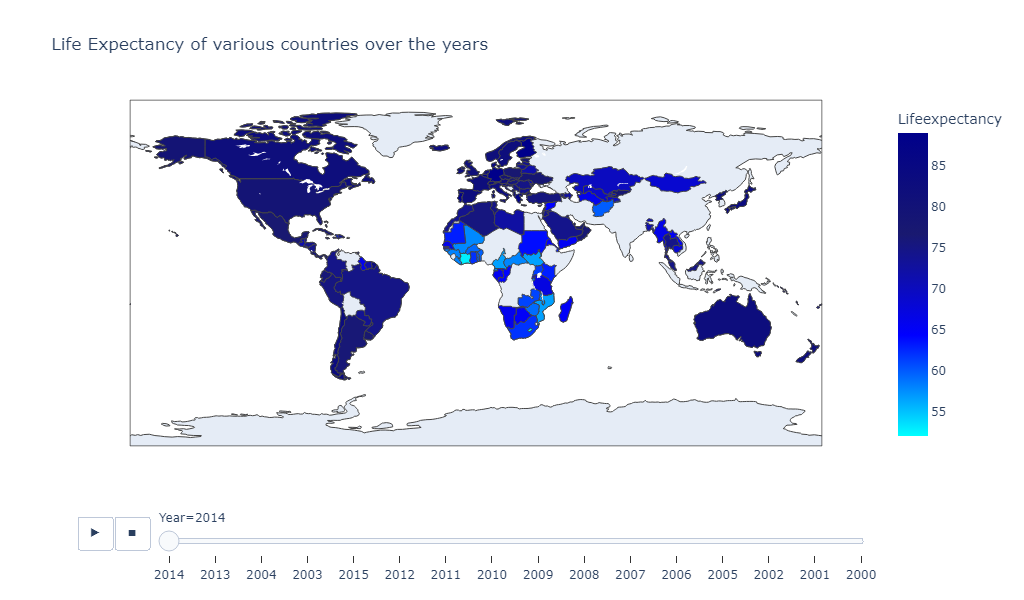

In [102]:
# Chloropleth map of different countries' Life Expectancy
list_countries = data['Country'].unique().tolist()
d_country_code = {} 
for country in list_countries:
    try:
        country_data = pycountry.countries.search_fuzzy(country)
        country_code = country_data[0].alpha_3
        d_country_code.update({country: country_code})
    except:
        print('could not add ISO 3 code for ->', country)
        d_country_code.update({country: ' '})

for k, v in d_country_code.items():
    data.loc[(data.Country == k), 'iso_alpha'] = v

fig = px.choropleth(data_frame = data,
                    title = "Life Expectancy of various countries over the years",
                    locations= "iso_alpha",
                    color= "Lifeexpectancy",  
                    hover_name= "Country",
                    color_continuous_scale= ['cyan','blue','midnightblue','darkblue'], 
                    animation_frame= "Year",
                    width=1000, height=600)

fig.show()

#### Convert categorical variables

To perform regression, we must first handle categorical variables because ML models often cannot accept *strings* or *categories*.

While there are different methods for dealing with categorical variables in machine learning, we will stick to one-hot encoding because it is simple to comprehend and suitable for medium-sized datasets (sample size 10000).

First, we must use `One-Hot Encoding` to turn category variables into dummy/indicator variables.

In [103]:
data.head()

Country  Year      Status                           Lifeexpectancy  \
1   Afghanistan  2014  Developing                                    59.90   
2   Afghanistan  2013  Developing                                    59.90   
11  Afghanistan  2004  Developing                                    57.00   
12  Afghanistan  2003  Developing                                    56.70   
16      Albania  2015  Developing                                    77.80   

                             AdultMortality  infantdeaths  \
1                                    271.00            64   
2                                    268.00            66   
11                                   293.00            87   
12                                   295.00            87   
16                                    74.00             0   

                                    Alcohol  \
1                                      0.01   
2                                      0.01   
11                                     0.02   
12                                     0.01   
16                                     4.60   

                      percentageexpenditure  \
1                                     73.52   
2                                     73.22   
11                                    15.30   
12                                    11.09   
16                                   364.98   

                                 HepatitisB  Measles  \
1                                     62.00      492   
2                                     64.00      430   
11                                    67.00      466   
12                                    65.00      798   
16                                    99.00        0   

                                        BMI  under-fivedeaths  \
1                                     18.60                86   
2                                     18.10                89   
11                                    13.80               120   
12                                    13.40               122   
16                                    58.00                 0   

                                      Polio  \
1                                     58.00   
2                                     62.00   
11                                     5.00   
12                                    41.00   
16                                    99.00   

                           Totalexpenditure  \
1                                      8.18   
2                                      8.13   
11                                     8.79   
12                                     8.82   
16                                     6.00   

                                 Diphtheria  \
1                                     62.00   
2                                     64.00   
11                                     5.00   
12                                    41.00   
16                                    99.00   

                                   HIV/AIDS  \
1                                      0.10   
2                                      0.10   
11                                     0.10   
12                                     0.10   
16                                     0.10   

                                        GDP  \
1                                    612.70   
2                                    631.74   
11                                   219.14   
12                                   198.73   
16                                 3,954.23   

                                 Population  \
1                                327,582.00   
2                             31,731,688.00   
11                            24,118,979.00   
12                             2,364,851.00   
16                                28,873.00   

                          thinness1-19years  \
1                                     17.50   
2                                     17.70   
11                                    1

In [104]:
data = data.drop(["iso_alpha"], axis=1)

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2413 entries, 1 to 2936
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       2413 non-null   object 
 1   Year                          2413 non-null   int64  
 2   Status                        2413 non-null   object 
 3   Lifeexpectancy                2413 non-null   float64
 4   AdultMortality                2413 non-null   float64
 5   infantdeaths                  2413 non-null   int64  
 6   Alcohol                       2413 non-null   float64
 7   percentageexpenditure         2413 non-null   float64
 8   HepatitisB                    2413 non-null   float64
 9   Measles                       2413 non-null   int64  
 10  BMI                           2413 non-null   float64
 11  under-fivedeaths              2413 non-null   int64  
 12  Polio                         2413 non-null   float64
 13  Tot

In [106]:
# Creating data2 = drop 'Country' and 'Year' columns
data2 = data.drop(["Country", "Year"], axis=1)

In [107]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2413 entries, 1 to 2936
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Status                        2413 non-null   object 
 1   Lifeexpectancy                2413 non-null   float64
 2   AdultMortality                2413 non-null   float64
 3   infantdeaths                  2413 non-null   int64  
 4   Alcohol                       2413 non-null   float64
 5   percentageexpenditure         2413 non-null   float64
 6   HepatitisB                    2413 non-null   float64
 7   Measles                       2413 non-null   int64  
 8   BMI                           2413 non-null   float64
 9   under-fivedeaths              2413 non-null   int64  
 10  Polio                         2413 non-null   float64
 11  Totalexpenditure              2413 non-null   float64
 12  Diphtheria                    2413 non-null   float64
 13  HIV

In [108]:
# Creating data3 for converting categorical variables
data3 = pd.get_dummies(data2)

In [109]:
# check out the new dataFrame
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2413 entries, 1 to 2936
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Lifeexpectancy                2413 non-null   float64
 1   AdultMortality                2413 non-null   float64
 2   infantdeaths                  2413 non-null   int64  
 3   Alcohol                       2413 non-null   float64
 4   percentageexpenditure         2413 non-null   float64
 5   HepatitisB                    2413 non-null   float64
 6   Measles                       2413 non-null   int64  
 7   BMI                           2413 non-null   float64
 8   under-fivedeaths              2413 non-null   int64  
 9   Polio                         2413 non-null   float64
 10  Totalexpenditure              2413 non-null   float64
 11  Diphtheria                    2413 non-null   float64
 12  HIV/AIDS                      2413 non-null   float64
 13  GDP

In [110]:
data3.head()

Lifeexpectancy  \
1                                     59.90   
2                                     59.90   
11                                    57.00   
12                                    56.70   
16                                    77.80   

                             AdultMortality  infantdeaths  \
1                                    271.00            64   
2                                    268.00            66   
11                                   293.00            87   
12                                   295.00            87   
16                                    74.00             0   

                                    Alcohol  \
1                                      0.01   
2                                      0.01   
11                                     0.02   
12                                     0.01   
16                                     4.60   

                      percentageexpenditure  \
1                                     73.52   
2                                     73.22   
11                                    15.30   
12                                    11.09   
16                                   364.98   

                                 HepatitisB  Measles  \
1                                     62.00      492   
2                                     64.00      430   
11                                    67.00      466   
12                                    65.00      798   
16                                    99.00        0   

                                        BMI  under-fivedeaths  \
1                                     18.60                86   
2                                     18.10                89   
11                                    13.80               120   
12                                    13.40               122   
16                                    58.00                 0   

                                      Polio  \
1                                     58.00   
2                                     62.00   
11                                     5.00   
12                                    41.00   
16                                    99.00   

                           Totalexpenditure  \
1                                      8.18   
2                                      8.13   
11                                     8.79   
12                                     8.82   
16                                     6.00   

                                 Diphtheria  \
1                                     62.00   
2                                     64.00   
11                                     5.00   
12                                    41.00   
16                                    99.00   

                                   HIV/AIDS  \
1                                      0.10   
2                                      0.10   
11                                     0.10   
12                                     0.10   
16                                     0.10   

                                        GDP  \
1                                    612.70   
2                                    631.74   
11                                   219.14   
12                                   198.73   
16                                 3,954.23   

                                 Population  \
1                                327,582.00   
2                             31,731,688.00   
11                            24,118,979.00   
12                             2,364,851.00   
16                                28,873.00   

                          thinness1-19years  \
1                                     17.50   
2                                     17.70   
11                                    19.50   
12                                    19.70   
16                                     1.20   

                           thinness5-9years  \
1                                     17.50   
2         

### 4. Methodology

In order to analyse this dataset, we will employ a number of approaches. 

1. We will utilise 
      a. Classification And Regression Tree (CART) 
      b. Random Forest (RF) 
      c. XGBoost 
   to estimate life expectancy.
2. We will utilise regression to examine specific variables such as education and alcohol consumption in relation to life expectancy.

### 5. Results and Discussion

#### Splitting data into random train and test subsets



When we train a machine learning model, we cannot train it on a single dataset, and even if we do, we will not be able to judge the performance of our model. As a result, we divided our source data into training and testing datasets. By default, `train_test_split` will split the data according to a 75:25 split. Here we input two dataframes (X and Y) and will get four outputs (train_x, test_x, train_y, test_y). The training set will be used to train the model and choose hyperparameters in the regression models. The testing set is only used to report on the completed model's performance.


In [111]:
random_state_split = 100
train_x, test_x, train_y, test_y = train_test_split(data3.drop(['Lifeexpectancy'], axis = 1), data3.Lifeexpectancy, random_state=random_state_split)

In [112]:
# Double check the rows and columns of the outputs.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

# check the index of train_x and train_y - they should be identical. The index indicates which rows from the original data.

print(train_x.index.identical(train_y.index))
print(test_x.index.identical(test_y.index))

(1809, 20)
(1809,)
(604, 20)
(604,)
True
True


#### a. CART, RF, and XGBoost Model


#### CART Model

We will construct a CART to predict the life expectancy, following two steps:

1. Tune the hyperparameters of max_depth and min_samples_split using cross validation;
2. Train a final model baesd on the tuned hyperparameters and evaluate the model performance.

We will concentrate on two hyperparameters that affect the model training stopping criteria: max_depth and min_samples_split.

*max_depth* refers to a tree's maximum depth (or height). If this value is not supplied in sklearn, the nodes will be enlarged until all leaves have samples with the same y value or until all leaves have less than min_samples_split samples.

Max_depth intuition: the greater the maximum tree depth, the better the model's fitness on the training data and hence the greater the danger of overfitting.

In an ideal world, the maximum tree height would be neither too little nor too enormous.

The minimal number of samples required to split a node is specified by *min_samples_split*. If a node has less samples than min_samples_split, it becomes a leaf node and does not split.

The smaller the value of min_samples_split, the better the model's fitness and hence the greater the potential of overfitting.

##### Tuning the hyperparameters using cross validation
We will use ```GridSearchCV``` to find the optimal combination of max_depth and min_samples_split. 

Note that in grid search, all combinations of hyperparameters will be tested and compared. In this case, 25 (5*5) different combinations of hyperparameters will be tested.

**Question - how to determine the potential values of max_depth and min_samples_split?**

For min_samples_split, as it is a positive integer value and the default value is 2, we can set the range as [2,4,6,8,10].

For max_depth, we can build a decision tree using default settings and check the tree depth, then choose the range around this tree depth.

The code below shows that the tree depth of a CART with default settings is 25, so we can set the range as [10,20,30,40,50].

In [113]:
# a CART using default settings
cart_default = DecisionTreeRegressor(random_state=0)
cart_default.fit(train_x, train_y)
# print the tree depth
print("Tree depth: {}".format(cart_default.get_depth()))

Tree depth: 23


In [114]:
# values of max_depth and min_samples_split
hyperparameters = {'max_depth':[10,20,30,40,50], 'min_samples_split':[2,4,6,8,10]}

randomState_dt = 10000
dt = DecisionTreeRegressor(random_state=randomState_dt)

# cv=5 by default, which means 5-fold cross-validation
clf = GridSearchCV(dt, hyperparameters)

clf.fit(train_x, train_y)

# we can query the best parameter value and its accuracy score
print ("The best parameter value is: ")
print (clf.best_params_)
print ("The best score is: ")
print (clf.best_score_)

The best parameter value is: 
{'max_depth': 10, 'min_samples_split': 10}
The best score is: 
0.9055199909516688


##### Training the final CART

In [115]:
dt_final = DecisionTreeRegressor(max_depth=clf.best_params_['max_depth'], min_samples_split=clf.best_params_['min_samples_split'], random_state=randomState_dt)
dt_final.fit(train_x, train_y)

DecisionTreeRegressor(max_depth=10, min_samples_split=10, random_state=10000)

In [116]:
print("R2 on the training data:")
print(dt_final.score(X=train_x, y=train_y))
print("R2 on the testing data:")
print(dt_final.score(X=test_x, y=test_y))

R2 on the training data:
0.9794014824508293
R2 on the testing data:
0.9223554329911441


When the R-squared values of the training and testing data are quite similar, it means that the model is generalizing well to new data.

R-squared (R2) is a statistical measure that represents the proportion of the variance in the dependent variable that is explained by the independent variables in a regression model. When building a regression model, it's important to evaluate its performance on both the training and testing data sets. The R2 value for the training set indicates how well the model fits the data used to train it, while the R2 value for the testing set indicates how well the model is likely to generalize to new data.

If the R2 values for the training and testing data sets are quite similar, it suggests that the model is not overfitting to the training data and that it is likely to perform well on new, unseen data.

In [117]:
print("RMSE on the training data:")
print(mean_squared_error(train_y, dt_final.predict(train_x), squared=False))
print("RMSE on the testing data:")
print(mean_squared_error(test_y, dt_final.predict(test_x), squared=False))

RMSE on the training data:
1.2912757971212216
RMSE on the testing data:
2.4738010046427656


RMSE are quite low. RMSE is expressed in the same units as the dependent variable in the dataset. A lower RMSE value indicates that the predictions made by the model are more accurate.

RMSE is often used in conjunction with R-squared (R2) to evaluate the performance of a regression model. While R2 measures the proportion of variance explained by the model, RMSE measures the magnitude of the errors made by the model in predicting the actual values.

##### Interpreting the CART

In [118]:
# some attributes of the tree
print("Tree depth:{}".format(dt_final.get_depth()))
print("Number of leaves:{}".format(dt_final.get_n_leaves()))

Tree depth:10
Number of leaves:210


There are various methods for inspecting and interpreting the CART.

One method is to view the entire tree and inspect each node and split. This is difficult for a tree with ten layers and over 200 leaves.

Another method is to use the permutation feature importance to determine the relative value of each characteristic.

We will utilise the **rfpimp** package to accomplish this.

Random forest permutation importance is abbreviated as **rfpimp**. It is a package that provides feature importances for standard scikit-learn models and implementations for random forest out-of-bag scores based on the permutation importance method. Terence Parr and Kerem Turgutlu designed it.

To compute the feature importance, we shall utilise the rfpimp.importances function.

The significance of a feature x is defined as the difference between the R2 model score (as determined by dt_final.score()) after and without shuffling x.

Because rearranging features is unlikely to significantly improve model performance, the feature importance is typically positive or close to zero.

Typically, the feature importance is used to compare the relative value of features. It is not advised to interpret the absolute value of this significance.

In [119]:
# the importances function returns a dataframe of two columns, Feature and Importance, and the features are ranked from the most important to the least.
imp = rfpimp.importances(dt_final, test_x, test_y)
print(imp)

                                                           Importance
Feature                                                              
AdultMortality                                                   0.25
HIV/AIDS                                                         0.22
Incomecompositionofresources                                     0.20
Schooling                                                        0.05
Alcohol                                                          0.03
thinness1-19years                                                0.03
thinness5-9years                                                 0.02
BMI                                                              0.02
infantdeaths                                                     0.02
Population                                                       0.01
Totalexpenditure                                                 0.01
Polio                                                            0.01
under-fivedeaths    

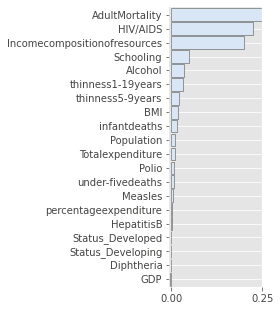

In [120]:
## Here is a barplot of the feature importance
viz = rfpimp.plot_importances(imp)
viz.view()

Adult mortality, HIV/AIDS, and income composition of resources are the most important features, according to the feature importance chart above.

Later, we will compare the feature importance of several models, including CART, RF, and GBDT.

#### Random Forest Model

In this section, we will forecast life expectancy using the random forest method. As CART, we will follow a basic workflow: tweak the hyperparameters, then train the final model.

There are two types of hyperparameters in RF:

1. Decision tree hyperparameters such as max_depth and min_samples_split; 
2. RF setups such as the number of trees (called n_estimators). n_estimators is set to 100 by default. According to some, the larger the n_estimators, the more stable the model performance and the longer the processing time. This is due to the fact that computing time is proportional to the number of trees.

We don't tune this hyperparameter because the default value of 100 trees is adequate for most applications.

As with CART, we will concentrate on optimising max_depth and min_samples_split.

In [121]:
# values of max_depth and min_samples_split
hyperparameters = {'max_depth':[10,20,30,40,50], 'min_samples_split':[2,4,6,8,10]}

randomState_dt = 10000
rf = RandomForestRegressor(random_state=randomState_dt)

# cv=5 by default, which means 5-fold cross-validation
clf = GridSearchCV(rf, hyperparameters)

clf.fit(train_x, train_y)

# we can query the best parameter value and its accuracy score
print ("The best parameter value is: ")
print (clf.best_params_)
print ("The best score is: ")
print (clf.best_score_)

The best parameter value is: 
{'max_depth': 30, 'min_samples_split': 2}
The best score is: 
0.9495742462741269


In [122]:
# Train the final RF
rf_final = RandomForestRegressor(max_depth=clf.best_params_['max_depth'], min_samples_split=clf.best_params_['min_samples_split'], random_state=randomState_dt)
rf_final.fit(train_x, train_y)

RandomForestRegressor(max_depth=30, random_state=10000)

In [123]:
print("R2 on the training data:")
print(rf_final.score(X=train_x, y=train_y))
print("R2 on the testing data:")
print(rf_final.score(X=test_x, y=test_y))

R2 on the training data:
0.9933088942110911
R2 on the testing data:
0.9569825572863462


The R2 on the testing data of RF is higher than CART, meaning that RF is better at making prediction for the unseen data and has a better generality.

In [124]:
print("RMSE on the training data:")
print(mean_squared_error(train_y, rf_final.predict(train_x), squared=False))
print("RMSE on the testing data:")
print(mean_squared_error(test_y, rf_final.predict(test_x), squared=False))

RMSE on the training data:
0.7359528241178716
RMSE on the testing data:
1.841329537313367


Visualising the trees in a random forest, like CART, is useless.

Calculate and plot the RF model's feature importance.

                                                           Importance
Feature                                                              
HIV/AIDS                                                         0.23
AdultMortality                                                   0.21
Incomecompositionofresources                                     0.19
BMI                                                              0.02
Schooling                                                        0.02
thinness5-9years                                                 0.01
Alcohol                                                          0.01
thinness1-19years                                                0.01
infantdeaths                                                     0.01
under-fivedeaths                                                 0.00
Totalexpenditure                                                 0.00
Population                                                       0.00
Diphtheria          

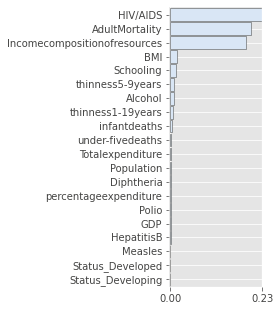

In [125]:
imp = rfpimp.importances(rf_final, test_x, test_y)
print(imp)
viz = rfpimp.plot_importances(imp)
viz.view()

Although the order of the variables are slightly different from CART, the top three variables are the same.

This suggests that these variables are actually crucial in predicting life expectancy.

#### XGBoost Model

In this section, we will forecast life expectancy using the XGBoost approach. As with CART and RF, we will use a straightforward approach to tweak the hyperparameters before training the final model.

XGBoost is a distinct library from the sklearn library. It includes the sklearn API, allowing us to use XGboost in the same way that we would use sklearn's RandomForestRegressor.

There are two types of hyperparameters in XGBoost:

1. Decision tree hyperparameters such as max_depth and min_samples_split; 
2. XGBoost configurations such as the number of trees (called n_estimators) and regularisation hyperparameters.

Some of the hyperparameters, such as alpha, lambda, and gamma, are related to the model's regularisation. Regularisation is a set of strategies used in machine learning to reduce model complexity and the likelihood of overfitting.

The adjustment of max_depth and n_estimators will be the emphasis of this section.

Please keep in mind that this grid search could take several minutes, which is longer than CART or random forest.

In [126]:
# values of max_depth and min_samples_split
hyperparameters = {'max_depth':[10,20,30,40,50], 'n_estimators':[50,100,150,200,250]}

randomState_xgb = 125
xgb = XGBRegressor(random_state=randomState_xgb)

# cv=5 by default, which means 5-fold cross-validation
gscv_xgb = GridSearchCV(xgb, hyperparameters)

gscv_xgb.fit(train_x, train_y)

# we can query the best parameter value and its accuracy score
print ("The best parameter value is: ")
print (gscv_xgb.best_params_)
print ("The best score is: ")
print (gscv_xgb.best_score_)

The best parameter value is: 
{'max_depth': 10, 'n_estimators': 150}
The best score is: 
0.9416805912827583


Train the final XGBoost

In [127]:
xgb_final = XGBRegressor(max_depth=gscv_xgb.best_params_['max_depth'], n_estimators=gscv_xgb.best_params_['n_estimators'], random_state=randomState_xgb)
xgb_final.fit(train_x, train_y)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=150, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=125,
             reg_alpha=0, reg_lambda=1, ...)

In [128]:
print("R2 on the training data:")
print(xgb_final.score(X=train_x, y=train_y))
print("R2 on the testing data:")
print(xgb_final.score(X=test_x, y=test_y))

R2 on the training data:
0.9999999808445633
R2 on the testing data:
0.948027631937632


The R2 on the testing data of XGBoost is lower than RF but higher than CART, meaning that XGBoost is not better at making prediction for the unseen data and has a better generality compare to RF.

In [129]:
print("RMSE on the training data:")
print(mean_squared_error(train_y, xgb_final.predict(train_x), squared=False))
print("RMSE on the testing data:")
print(mean_squared_error(test_y, xgb_final.predict(test_x), squared=False))

RMSE on the training data:
0.001245222777605497
RMSE on the testing data:
2.0239299543851645


Visualising the trees in a XGBoost, like CART and random forest, is useless.

Calculate and plot the XGBoost model's feature importance.

                                                           Importance
Feature                                                              
AdultMortality                                                   0.26
Incomecompositionofresources                                     0.22
HIV/AIDS                                                         0.12
thinness5-9years                                                 0.03
infantdeaths                                                     0.02
Alcohol                                                          0.01
Schooling                                                        0.01
under-fivedeaths                                                 0.01
percentageexpenditure                                            0.01
BMI                                                              0.01
Diphtheria                                                       0.01
thinness1-19years                                                0.01
Totalexpenditure    

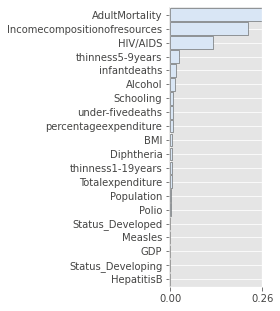

In [130]:
imp = rfpimp.importances(xgb_final, test_x, test_y) # permutation
print(imp)
viz = rfpimp.plot_importances(imp)
viz.view()

The variables are in the different sequence as in CART and RF. Although the order of the variables are slightly different from CART and Random Forest, the top three variables are the same.

This suggests that these variables are actually crucial in predicting life expectancy.


#### Comparing three models

In [131]:
# create a list of models
list_name_models = ['CART', 'RF', 'XGBoost']
# use the models from above
list_reg_models = [dt_final, rf_final, xgb_final]

dict_models = dict()

for name, model in zip(list_name_models, list_reg_models):
    dict_models[name] = [model.score(train_x, train_y), model.score(test_x, test_y), model.score(train_x, train_y) - model.score(test_x, test_y)]

# transform dict_models to dataframe
df_models = pd.DataFrame.from_dict(dict_models, orient='index', columns=['R2_train_data', 'R2_test_data', 'R2_diff'])
df_models
# you can then export df_models as a csv file and use it in MS Excel or Word
# df_models.to_csv(...)

R2_train_data  \
CART                                        0.98   
RF                                          0.99   
XGBoost                                     1.00   

                                    R2_test_data  \
CART                                        0.92   
RF                                          0.96   
XGBoost                                     0.95   

                                         R2_diff  
CART                                        0.06  
RF                                          0.04  
XGBoost                                     0.05

The above result shows that the RF model has a higher R2 on the testing data than CART and XGBoost, as well as a smaller R2 difference betwen training and testing data.

This indicates that the RF model is less subject to the overfitting issue and has a better generalisation.

#### b. Regression Model

In [132]:
# Checking the data
data3.head()

Lifeexpectancy  \
1                                     59.90   
2                                     59.90   
11                                    57.00   
12                                    56.70   
16                                    77.80   

                             AdultMortality  infantdeaths  \
1                                    271.00            64   
2                                    268.00            66   
11                                   293.00            87   
12                                   295.00            87   
16                                    74.00             0   

                                    Alcohol  \
1                                      0.01   
2                                      0.01   
11                                     0.02   
12                                     0.01   
16                                     4.60   

                      percentageexpenditure  \
1                                     73.52   
2                                     73.22   
11                                    15.30   
12                                    11.09   
16                                   364.98   

                                 HepatitisB  Measles  \
1                                     62.00      492   
2                                     64.00      430   
11                                    67.00      466   
12                                    65.00      798   
16                                    99.00        0   

                                        BMI  under-fivedeaths  \
1                                     18.60                86   
2                                     18.10                89   
11                                    13.80               120   
12                                    13.40               122   
16                                    58.00                 0   

                                      Polio  \
1                                     58.00   
2                                     62.00   
11                                     5.00   
12                                    41.00   
16                                    99.00   

                           Totalexpenditure  \
1                                      8.18   
2                                      8.13   
11                                     8.79   
12                                     8.82   
16                                     6.00   

                                 Diphtheria  \
1                                     62.00   
2                                     64.00   
11                                     5.00   
12                                    41.00   
16                                    99.00   

                                   HIV/AIDS  \
1                                      0.10   
2                                      0.10   
11                                     0.10   
12                                     0.10   
16                                     0.10   

                                        GDP  \
1                                    612.70   
2                                    631.74   
11                                   219.14   
12                                   198.73   
16                                 3,954.23   

                                 Population  \
1                                327,582.00   
2                             31,731,688.00   
11                            24,118,979.00   
12                             2,364,851.00   
16                                28,873.00   

                          thinness1-19years  \
1                                     17.50   
2                                     17.70   
11                                    19.50   
12                                    19.70   
16                                     1.20   

                           thinness5-9years  \
1                                     17.50   
2         

##### Summary Statistics

This is a critical step since it provides the reader with a qualitative sense of your data before you analyse it. It also serves to demonstrate that you cleaned the data correctly and that the variable measures make sense.

In [133]:
summary=data3.describe().round(2)  # generate summary statistics, and round everything to 2 decimal degrees
summary=summary.T #.T transposes the table (rows become columns and vice versa)
summary

count  \
Lifeexpectancy                                               2,413.00   
AdultMortality                                               2,413.00   
infantdeaths                                                 2,413.00   
Alcohol                                                      2,413.00   
percentageexpenditure                                        2,413.00   
HepatitisB                                                   2,413.00   
Measles                                                      2,413.00   
BMI                                                          2,413.00   
under-fivedeaths                                             2,413.00   
Polio                                                        2,413.00   
Totalexpenditure                                             2,413.00   
Diphtheria                                                   2,413.00   
HIV/AIDS                                                     2,413.00   
GDP                                                          2,413.00   
Population                                                   2,413.00   
thinness1-19years                                            2,413.00   
thinness5-9years                                             2,413.00   
Incomecompositionofresources                                 2,413.00   
Schooling                                                    2,413.00   
Status_Developed                                             2,413.00   
Status_Developing                                            2,413.00   

                                                                 mean  \
Lifeexpectancy                                                  70.50   
AdultMortality                                                 155.37   
infantdeaths                                                    10.34   
Alcohol                                                          4.88   
percentageexpenditure                                          835.29   
HepatitisB                                                      82.68   
Measles                                                         88.98   
BMI                                                             41.06   
under-fivedeaths                                                14.40   
Polio                                                           85.22   
Totalexpenditure                                                 6.10   
Diphtheria                                                      84.97   
HIV/AIDS                                                         1.58   
GDP                                                          8,245.16   
Population                                               8,185,980.47   
thinness1-19years                                                4.17   
thinness5-9years                                                 4.17   
Incomecompositionofresources                                     0.64   
Schooling                                                       12.39   
Status_Developed                                                 0.20   
Status_Developing                                                0.80   

                                                                  std  \
Lifeexpectancy                                                   8.97   
AdultMortality                                                 119.35   
infantdeaths                                                    24.40   
Alcohol                                                          3.94   
percentageexpenditure                                        2,125.63   
HepatitisB                                                      21.86   
Measles                                                        186.94   
BMI                                                             19.54   
under-fivedeaths                                                35.42   
Polio                                                           21.44   
Totalexpenditure                               

##### Assumptions

a. Homoscedasticity 

**`Linear regression assumes that the variance of residuals is the same for any value of $x$, and that residuals are normally distributed with a mean of 0.`**

This is a complicated way of saying your regression line should fit consistently across the full range of $x$ values. If there are really small residuals (i.e., all the data points are close to the line) for low values of $x$, but larger residuals for high values of $x$, the regression is not performing well-- we wouldn't have the same confidence in our predictions at different values of $x$. Similarly, if all the residuals are on one side of the regression line in different parts of the $x$ range, the model will consistently over/underestimate in those regions. When the variance of residuals from a regression model are inconsistent, we have **`Heteroscedasticity`**. 

We can explore potential heteroscedasticity by visually inspecting a regression plot. In our case, we're primarily interested in the relationship between years of schooling and alcohol consumption to life expectancy, so we'll be plotting these variables against each other. `sns.jointplot()` lets us create a plot with four components which can help us diagnose potential heteroscedasticity:

- The main plot is a scatterplot between life expectancy on the y axis, and years of schooling on the x axis. 
- A regression line overlaid on this plot lets us see the relationship between our model and the underlying data 
- A histogram to the right of the plot shows the distribution of the life expectancy variable, which is a bit skewed.
- A histogram above the plot shows the distribution of the years of schooling variable, which a bit skewed as well. 

Text(560.7857142857143, 0.5, 'Life Expectancy')

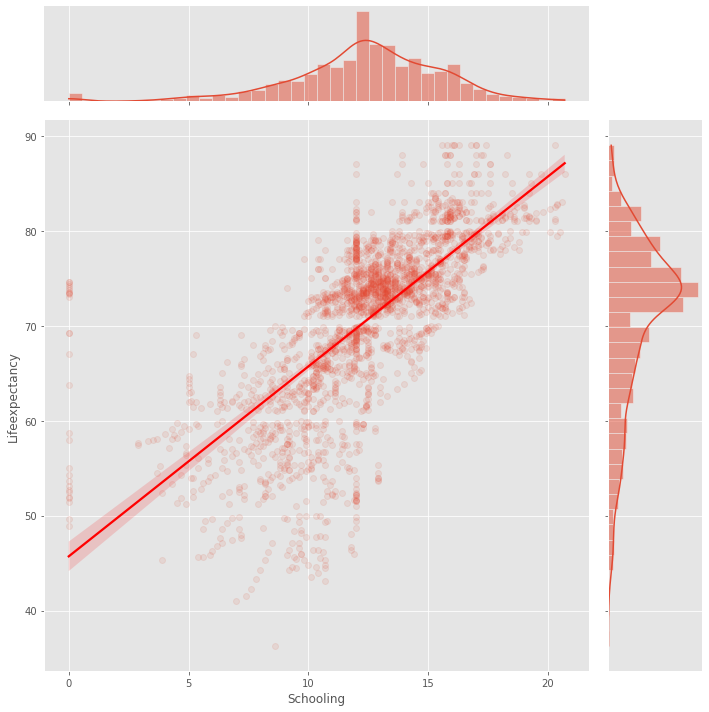

In [135]:
sns.jointplot(data=data3, # plot a scatterplot with a regression line and two histograms
                x='Schooling', # set the x axis to be the years of schooling
                y='Lifeexpectancy', # set the y axis to be the hourly wage
                kind="reg",  # set the kind of plot to be a regression plot
                scatter_kws=dict(alpha=0.1), # set the transparency of the points to be 0.1 (10%)
                line_kws=dict(color='red'), # set the color of the regression line to red
                height=10) # set the height of the plot to be 10 inches 

plt.xlabel('Years of Schooling') # add a label to the x axis
plt.ylabel('Life Expectancy') # add a label to the y axis

From the plot above, we do not have to concern. We could say the regression line quite fit consistently across the full range of x values, Homoscedasticity. 

b. Multicollinearity

**`Multicollinearity emerges when two or more independent variables which are highly correlated are included in a model.`** A key goal of regression analysis is to isolate the relationship between each independent variable and the dependent variable. The interpretation of a regression coefficient is that it represents the mean change in the dependent variable for each 1 unit change in an independent variable when you hold all of the other independent variables constant. 

The idea is that you can change the value of one independent variable and not the others. However, when independent variables are correlated, it indicates that changes in one variable are associated with shifts in another variable. The stronger the correlation, the more difficult it is to change one variable without changing another.

Though a very high correlation coefficient between independent variables is a cause for concern, the formal way of dealing with muticollinearity is through the use of the **`Variance Inflation Factor (VIF)`**. VIF is the ratio of the variance in a model with multiple predictors by the variance of a model with a single predictor: 

$$\large VIF_j=\frac{1}{1-R_{j}^{2}}$$

VIFs start at 1 and have no upper limit. A value of 1 indicates that there is no correlation between this independent variable and any others. VIFs between 1 and 5 suggest that there is a moderate correlation, but it is not severe enough to warrant corrective measures. VIFs greater than 5 represent critical levels of multicollinearity where the coefficients are poorly estimated, and the p-values are questionable.

Below is a function that calculates VIF for each independent variable in a dataframe, and drops them if they exceed a threshold (set to 5).

In [139]:
# calculating VIF
# This function is amended from: https://stackoverflow.com/a/51329496/4667568

from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(data3, list_var_not_to_remove=None, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param list_var_not_to_remove: the list of variables that should not be removed even though it has a high VIF. For example, dummy (or indicator) variables represent a categorical variable with three or more categories.
    :param thresh: the max VIF value before the feature is removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data
        df_with_const = add_constant(data3)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const as const should not be removed
        vif_df = vif_df.drop('const')
        
        # drop the variables that should not be removed
        if list_var_not_to_remove is not None:
            vif_df = vif_df.drop(list_var_not_to_remove)
            
        print('Max VIF:', vif_df.VIF.max())
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            data3 = data3.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return data3

Implement in our dataset

In [141]:
varss = ['AdultMortality', 'infantdeaths', 'Alcohol', 'percentageexpenditure',
       'HepatitisB', 'Measles', 'BMI', 'Polio', 'Totalexpenditure',
       'Diphtheria', 'HIV/AIDS', 'Population', 'thinness1-19years',
       'Incomecompositionofresources', 'Schooling', 'Status_Developing', 'Status_Developed', 'under-fivedeaths', 'thinness5-9years',
        'GDP']

vif = drop_column_using_vif_(data3[varss], thresh=5)
print("The columns remaining after VIF selection are:")
print(vif.columns)

Max VIF: inf
Dropping: Status_Developing
Max VIF: 61.52465248072772
Dropping: under-fivedeaths
Max VIF: 21.243857358262545
Dropping: thinness5-9years
Max VIF: 5.357779601234155
Dropping: GDP
Max VIF: 3.0489266480571864
The columns remaining after VIF selection are:
Index(['AdultMortality', 'infantdeaths', 'Alcohol', 'percentageexpenditure',
       'HepatitisB', 'Measles', 'BMI', 'Polio', 'Totalexpenditure',
       'Diphtheria', 'HIV/AIDS', 'Population', 'thinness1-19years',
       'Incomecompositionofresources', 'Schooling', 'Status_Developed'],
      dtype='object')


The maximum VIF value encountered was 3.05-- well within the acceptable range. Having explored our data through visualizations and summary statistics, and checked the assumptions of linear regression, we're now ready to begin building a model.

##### Regression

Remember, the Ordinary Least Squares (OLS) regression seeks to find a straight line that best describes the relationship between two variables: 

$$y= \beta_0 + \beta_1x+\epsilon $$

In our case, we're trying to predict life expectancy-- this is our **dependent variable**, and there can be only one per regression. The variable we're using to predict life expectancy is years of schooling, which is our **independent variable**. We can have multiple of these per regression. As such, the regression equation in our scenario looks like this: 

$$Life\ Expectancy= \beta_0 + \beta_1 \times Years\ of\ Schooling +\epsilon $$

Because the regression model will estimate the parameters $\beta_0, \beta_1$ and $\epsilon$, we just need to supply python with $x$ and $y$; We can do so by passing `Lifeexpectancy ~  Schooling` to the `ols()` function from statsmodels. This will run a regression of the form specified above, which we will store in an variable called `model`. We can get the output from this model using `model.summary()`:

In [144]:
# Life expectancy and Schooling
from statsmodels.formula.api import ols
from statsmodels.iolib.summary2 import summary_col

model= ols('Lifeexpectancy ~  Schooling', data=data3).fit() # fit the model
print(model.summary()) # print the summary


                            OLS Regression Results                            
Dep. Variable:         Lifeexpectancy   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     2451.
Date:                Mon, 24 Apr 2023   Prob (F-statistic):               0.00
Time:                        15:09:02   Log-Likelihood:                -7870.8
No. Observations:                2413   AIC:                         1.575e+04
Df Residuals:                    2411   BIC:                         1.576e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     45.7168      0.517     88.468      0.0

We focus on a couple parts of this output:

* `R-squared`: This value tells the proportion of the variation in our dependent variable (Life expectancy) that is explained by the model we fit. In this case we can interpret it as follows: 
    * **50.4% of the variation in life expectancy can be explained by this regresion model**

* `coef`: These are our $\beta$ estimates; it is the slope of the regression line that describes the relationship between a given independent variable (Schooling) and the dependent variable (Lifeexpectancy). There are two coefficients listed under this 
    * `Schooling`: This is $\beta_1$, the slope coefficient on the years of schooling variable. It tells us the change in $y$ that results from a 1-unit increase in $x$. In robotic terms, we can interpret it as follows: 
        * **A 1 unit increase in `Schooling` leads to a 1.99 increase in `Life Expectancy`**. But we are not robots, and both of these variables are in units that we can interpret in plain english. Here's a more natural interpretation:
        * **On average, every additional year of schooling is associated with a 1.99 (year) increase in life expectancy.** 

    * `Intercept`: This is $\beta_0$. It tells us the value of $y$ when all of the independent variables in the model are held at 0. In this case, it can be interpreted as
        * **According to our model, a person with 0 years of schooling is predicted to live 45.7 years**
    
    
* `P>|t|`: this is known as the "p-value", and is the main measure of statistical significance. **A p-value denotes the probability of obtaining a result at least as extreme as the one observed, assuming that the null hypothesis is true**. In the case of a regression, the null hypothesis is that there is no relationship between our variables-- increasing $x$ has no effect on $y$. In other words, that the regression line is flat: $\beta_1=0$ . A p-value of 0.05 means that the coefficient is statistically significant at the 5% level. In our case, the p-value is 0.000 (note: this doesn't mean it's equal to zero, just very very small), and we can therefore reject the null hypothesis that $\beta_1=0$ at the 1% confidence level.

In [145]:
# Life expectancy and Alcohol consumption
from statsmodels.formula.api import ols
from statsmodels.iolib.summary2 import summary_col

model= ols('Lifeexpectancy ~  Alcohol', data=data3).fit() # fit the model
print(model.summary()) # print the summary

                            OLS Regression Results                            
Dep. Variable:         Lifeexpectancy   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     449.4
Date:                Mon, 24 Apr 2023   Prob (F-statistic):           1.32e-91
Time:                        15:09:08   Log-Likelihood:                -8510.9
No. Observations:                2413   AIC:                         1.703e+04
Df Residuals:                    2411   BIC:                         1.704e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     66.0962      0.267    247.750      0.0

* `R-squared`: This value tells the proportion of the variation in our dependent variable (Life expectancy) that is explained by the model we fit. In this case we can interpret it as follows: 
    * **15.7% of the variation in life expectancy can be explained by this regresion model**

* `coef`: These are our $\beta$ estimates; it is the slope of the regression line that describes the relationship between a given independent variable (Alcohol) and the dependent variable (Lifeexpectancy). There are two coefficients listed under this 
    * `Alcohol`: This is $\beta_1$, the slope coefficient on the recorded per capita (15+) consumption (in litres of pure alcohol) variable. It tells us the change in $y$ that results from a 1-unit increase in $x$. In robotic terms, we can interpret it as follows: 
        * **A 1 unit increase in `Alcohol` leads to a 0.9 increase in `Life Expectancy`**. But we are not robots, and both of these variables are in units that we can interpret in plain english. Here's a more natural interpretation:
        * **On average, every additional litre of alcohol consumption is associated with a 0.9 (year) increase in life expectancy.** 

    * `Intercept`: This is $\beta_0$. It tells us the value of $y$ when all of the independent variables in the model are held at 0. In this case, it can be interpreted as
        * **According to our model, a person with 0 litre of alcohol consumption is predicted to live 66 years**

### 6. Conclusion

This data analysis is carried out in order to answer our research question: 
a. Which of the following predictive characteristics has an effect on life expectancy? 
b. Which has a higher impact on life expectancy in 193 countries, alcohol consumption or education?

1. The RF model has a higher R2 on testing data than CART and XGBoost, as well as a smaller R2 gap between training and testing data, when predicting and comparing three models. This suggests that the RF model is less prone to overfitting and has higher generality.
2. From regression result of schooling and alcohol consumption to life expectancy: 
a. Each additional year of education is related with a 1.99 (year) increase in life expectancy. 
b. Every extra litre of alcohol consumed is connected with a 0.9 (year) increase in life expectancy.

### References and Acknowledgements 

Bali, V. et al. (2021) ‘Life Expectancy: Prediction & Analysis using ML’, in 2021 9th International Conference on Reliability, Infocom Technologies and Optimization (Trends and Future Directions) (ICRITO). 2021 9th International Conference on Reliability, Infocom Technologies and Optimization (Trends and Future Directions) (ICRITO), Noida, India: IEEE, pp. 1–8. Available at: https://doi.org/10.1109/ICRITO51393.2021.9596123.

Chandirasekeran, P. et al. (2022) ‘Analyzing Implications of Various Social Factors on Life Expectancy’, National Academy Science Letters, 45(4), pp. 311–316. Available at: https://doi.org/10.1007/s40009-022-01118-6.

Faisal, K. et al. (2021) ‘Life Expectancy Estimation based on Machine Learning and Structured Predictors’, in Proceedings of the 3rd International Conference on Advanced Information Science and System. AISS 2021: 2021 3rd International Conference on Advanced Information Science and System, Sanya China: ACM, pp. 1–8. Available at: https://doi.org/10.1145/3503047.3503122.

Meshram, S.S. (2020) ‘Comparative analysis of life expectancy between developed and developing countries using machine learning’, in 2020 IEEE bombay section signature conference (IBSSC), pp. 6–10. Available at: https://doi.org/10.1109/IBSSC51096.2020.9332159.

Dr Huanfa Chen's (my lecturer at UCL) [Github](https://github.com/huanfachen/DSSS)

Sources from Kaggle [source1](https://www.kaggle.com/code/varunsaikanuri/life-expectancy-visualization) and [source2](https://www.kaggle.com/code/vishesh1412/life-expectancy-prediction-feature-selection-ols#Plotting-Distributions-of-the-Attributes)